# Supervised and Unsupervised Learning

## Exercise 1

In [1]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

In [2]:
x = np.array([1, 4, 5, 8, 10])
y = np.array([3, 9, 11, 17, 21])

print('x:', x)
print('y:', y)

x: [ 1  4  5  8 10]
y: [ 3  9 11 17 21]


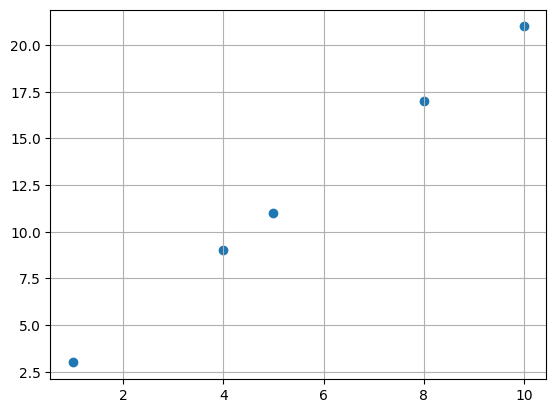

In [3]:
plt.scatter(x, y)
plt.grid()

In [4]:
p = Polynomial.fit(x, y, deg=1, domain=[])
p

Polynomial([1., 2.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

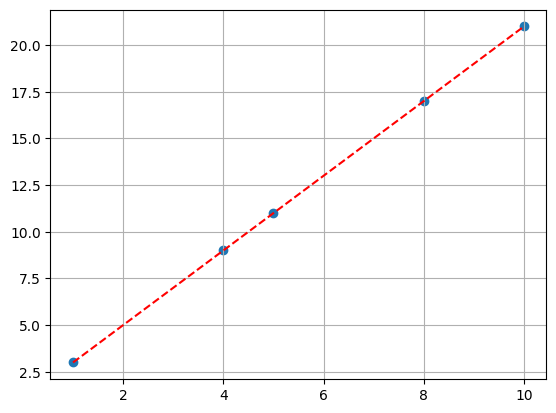

In [5]:
plt.scatter(x, y)
plt.plot(x, p(x), 'r--')
plt.grid()

In [6]:
y2 = np.array([3, 7, 11, 15, 22])

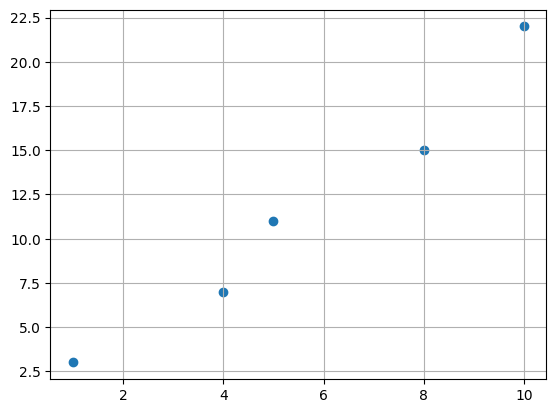

In [7]:
plt.scatter(x, y2)
plt.grid()

In [8]:
p2 = Polynomial.fit(x, y2, deg=1, domain=[])
p2

Polynomial([0.08130081, 2.05691057], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

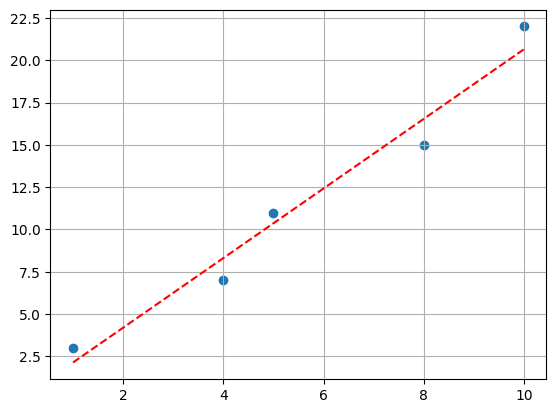

In [9]:
plt.scatter(x, y2)
plt.plot(x, p2(x), 'r--')
plt.grid()

In [10]:
p2_high_order = Polynomial.fit(x, y2, deg=9, domain=[])
p2_high_order

/home/fbaltor/.local/lib/python3.10/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


Polynomial([ 5.60538021e+00, -3.55557833e+00,  9.08046619e-01,  4.63423859e-02,
       -3.39750818e-03, -7.27176506e-04, -6.40644296e-05, -2.49071240e-06,
        2.77777615e-07,  8.26898799e-08], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

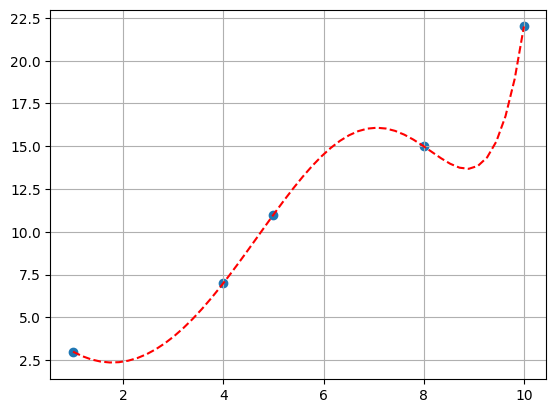

In [11]:
x_continous = np.linspace(x[0], x[-1])
plt.scatter(x, y2)
plt.plot(x_continous, p2_high_order(x_continous), 'r--')
plt.grid()

In [12]:
p(3), p2(3), p2_high_order(3)

(7.000000000000002, 6.252032520325201, 3.861707075666267)

## Exercise 2 and 3

In [13]:
from sklearn import datasets
import pandas as pd

iris_dataset = datasets.load_iris()
print("Descrição da base de dados :: ", iris_dataset['DESCR'])

Descrição da base de dados ::  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ====

In [14]:
for key, value in iris_dataset.items():
    print(key)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [15]:
iris_dataset.feature_names, type(iris_dataset.data)

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 numpy.ndarray)

In [16]:
data = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
data = data.rename(columns = {
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
})

data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
iris_dataset.target_names, type(iris_dataset.target_names)

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'), numpy.ndarray)

In [18]:
data['target'] = iris_dataset.target
data['target_name'] = [iris_dataset.target_names[target] for target in iris_dataset.target]

data

,sepal_length,sepal_width,petal_length,petal_width,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [19]:
data.target_name.unique(), data.columns

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target',
        'target_name'],
       dtype='object'))

In [20]:
setosa = data[data.target_name == 'setosa']
versicolor = data[data.target_name == 'versicolor']
virginica = data[data.target_name == 'virginica']

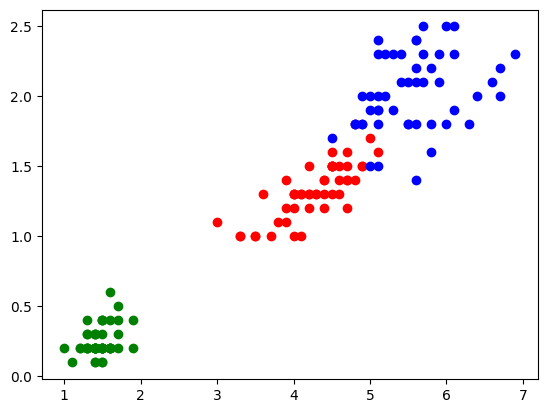

In [21]:
attr_x = 'petal_length'
attr_y = 'petal_width'

plt.scatter(setosa[attr_x], setosa[attr_y], color='green')
plt.scatter(versicolor[attr_x], versicolor[attr_y], color='red')
plt.scatter(virginica[attr_x], virginica[attr_y], color='blue')

In [22]:
for attr in data.columns:
    if attr == 'target_name' or attr == 'target':
        break
        
    corr = np.corrcoef(data[attr], data.target)[1, 0]
    print(f'correlation of {attr} and target: {corr}')

correlation of sepal_length and target: 0.7825612318100819
correlation of sepal_width and target: -0.4266575607811244
correlation of petal_length and target: 0.9490346990083889
correlation of petal_width and target: 0.9565473328764034


    Summary Statistics

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

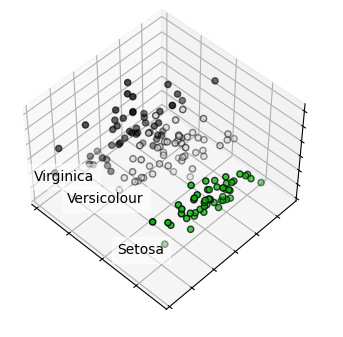

In [23]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

# Perceptron

## Exercise 3

In [24]:
import numpy as np

In [26]:
def initialize(dimension, learning_rate = 0.1):
    return np.ones(dimension + 1), learning_rate

def iterate(x, r, w, learning_rate):
    u = np.dot(x, w)
    
    if u > 0:
        y = 1
    else:
        y = 0
    
    error = r - y
    w = w + learning_rate * error * x
    
    return w

def train(x, r, steps = 10):
    

SyntaxError: incomplete input (1395013409.py, line 18)

In [40]:
# AND gate inputs

# Original data, where columns 0 to N-1 are input variables, the last
# column is the target and the rows are samples
data = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]])
samples = data.shape[0]

# Bias value, an arbitrary constant
bias = 1
# Augmenting the data to consider the bias as a 'x0' input variable
data = np.concatenate(((bias * np.ones(samples))[:, np.newaxis], data), axis = 1)

data

array([[1., 0., 0., 0.],
       [1., 0., 1., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 1.]])

In [42]:
x = data[:, 0:-1]
target = data[:, -1]

x, target

(array([[1., 0., 0.],
        [1., 0., 1.],
        [1., 1., 0.],
        [1., 1., 1.]]),
 array([0., 0., 0., 1.]))

In [43]:
x.shape

(4, 3)

In [34]:
input_dimension = x.shape[1]
w = 
learning_rate = 0.1
epochs = 10

w, learning_rate, epochs

(array([1., 1., 1.]), 0.1, 10)

In [35]:
range(epochs)

range(0, 10)

In [ ]:
for i in range(epochs):
    for x_sample in x:
        

In [9]:
# AND gate

